In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import re

In [18]:
reference_data_new = pd.read_csv("data/raw_aact/combined_neuro_trials_with_interventions_20240313.csv")

# Load annotated data

In [168]:
snomed_annotations = pd.read_csv('data/annotated_aact/sapbert_snomed_linked_all_annotations_19607.csv', index_col=False)[['nct_id','aact_snomed_term_norminterventions','aact_snomed_term_norm_condition', 'linkbert_snomed_term_norminterventions','linkbert_snomed_term_norm_condition', 'linkbert_snomed_mapped_term_condition']]
snomed_annotations.head()

,nct_id,aact_snomed_term_norminterventions,aact_snomed_term_norm_condition,linkbert_snomed_term_norminterventions,linkbert_snomed_term_norm_condition,linkbert_snomed_mapped_term_condition
0,NCT00000117,Immunoglobulin,Optic neuritis,Administration of immunoglobulin by intravenou...,Multiple sclerosis|Optic neuritis,Multiple sclerosis|Optic neuritis
1,NCT00000146,Methylprednisolone|Prednisone,Multiple sclerosis|Optic neuritis,Corticosteroid and/or corticosteroid derivativ...,Multiple sclerosis|Optic neuritis,Multiple sclerosis|Optic neuritis
2,NCT00000147,Methylprednisolone|Prednisone,Multiple sclerosis|Optic neuritis,Corticosteroid and/or corticosteroid derivativ...,Multiple sclerosis|Optic neuritis,Multiple sclerosis|Optic neuritis
3,NCT00000151,Aspirin (substance)|Aspirin (substance),Diabetic retinopathy|Legal blindness,Aspirin (substance)|Aspirin (substance),Legal blindness|Diabetes mellitus|Diabetic ret...,Visual disturbance|Diabetes mellitus|Disorder ...
4,NCT00000170,Atropine (substance)|Each (qualifier value),Amblyopia (disorder),Atropine (substance),Amblyopia (disorder)|Anisometropia|Moderate vi...,Amblyopia (disorder)|Anisometropia|Visual impa...


In [169]:
norm_annotations = pd.read_csv('data/annotated_aact/normalized_annotations_unique_19607.csv', index_col=False)
norm_annotations.head(5)

,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_aact_interventions,aact_intervention_types,canonical_BioLinkBERT-base_conditions,canonical_aact_conditions,Disease Class
0,0,NCT00000117,intravenous immunoglobulin|ivig,immunoglobulin,Drug,multiple sclerosis|optic neuritis,optic neuritis,Cranial Nerve Diseases
1,1,NCT00000146,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
2,2,NCT00000147,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
3,3,NCT00000151,acetylsalicylic acid|aspirin,aspirin|acetylsalicylic acid,Drug|Procedure,blindness|diabetes mellitus|diabetic retinopat...,diabetic retinopathy|blindness,Neurologic Manifestations|unknown
4,4,NCT00000170,atropine,atropine|,Drug|Device,amblyopia|anisometropia|moderate amblyopia|str...,amblyopia,Neurologic Manifestations


In [170]:
norm_annotations = pd.merge(norm_annotations, snomed_annotations, on='nct_id')
norm_annotations.head()

,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_aact_interventions,aact_intervention_types,canonical_BioLinkBERT-base_conditions,canonical_aact_conditions,Disease Class,aact_snomed_term_norminterventions,aact_snomed_term_norm_condition,linkbert_snomed_term_norminterventions,linkbert_snomed_term_norm_condition,linkbert_snomed_mapped_term_condition
0,0,NCT00000117,intravenous immunoglobulin|ivig,immunoglobulin,Drug,multiple sclerosis|optic neuritis,optic neuritis,Cranial Nerve Diseases,Immunoglobulin,Optic neuritis,Administration of immunoglobulin by intravenou...,Multiple sclerosis|Optic neuritis,Multiple sclerosis|Optic neuritis
1,1,NCT00000146,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases,Methylprednisolone|Prednisone,Multiple sclerosis|Optic neuritis,Corticosteroid and/or corticosteroid derivativ...,Multiple sclerosis|Optic neuritis,Multiple sclerosis|Optic neuritis
2,2,NCT00000147,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases,Methylprednisolone|Prednisone,Multiple sclerosis|Optic neuritis,Corticosteroid and/or corticosteroid derivativ...,Multiple sclerosis|Optic neuritis,Multiple sclerosis|Optic neuritis
3,3,NCT00000151,acetylsalicylic acid|aspirin,aspirin|acetylsalicylic acid,Drug|Procedure,blindness|diabetes mellitus|diabetic retinopat...,diabetic retinopathy|blindness,Neurologic Manifestations|unknown,Aspirin (substance)|Aspirin (substance),Diabetic retinopathy|Legal blindness,Aspirin (substance)|Aspirin (substance),Legal blindness|Diabetes mellitus|Diabetic ret...,Visual disturbance|Diabetes mellitus|Disorder ...
4,4,NCT00000170,atropine,atropine|,Drug|Device,amblyopia|anisometropia|moderate amblyopia|str...,amblyopia,Neurologic Manifestations,Atropine (substance)|Each (qualifier value),Amblyopia (disorder),Atropine (substance),Amblyopia (disorder)|Anisometropia|Moderate vi...,Amblyopia (disorder)|Anisometropia|Visual impa...


In [187]:
norm_annotations[norm_annotations['canonical_BioLinkBERT-base_conditions'].str.contains('stroke', na=False)]


,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_aact_interventions,aact_intervention_types,canonical_BioLinkBERT-base_conditions,canonical_aact_conditions,Disease Class,aact_snomed_term_norminterventions,aact_snomed_term_norm_condition,linkbert_snomed_term_norminterventions,linkbert_snomed_term_norm_condition,linkbert_snomed_mapped_term_condition
151,151,NCT00000514,NaN,chlorthalidone|reserpine|atenolol,Drug,isolated systolic hypertension|stroke,heart diseases|hypertension|cerebrovascular di...,Central Nervous System Diseases|unknown,Chlorthalidone|Reserpine (substance)|Atenolol ...,Heart disease|High blood pressure|Cerebrovascu...,NaN,Systolic essential hypertension (disorder)|CVA...,High blood pressure|CVA - Cerebrovascular acci...
152,152,NCT00000517,oral anticoagulant,warfarin,Drug,atrial fibrillation|embolic stroke|rheumatic h...,atrial fibrillation|heart diseases|cerebral em...,Central Nervous System Diseases|unknown,Warfarin (substance),Atrial fibrillation|Heart disease|Cerebral emb...,Anticoagulant (substance),Atrial fibrillation|Embolic stroke (disorder)|...,Atrial fibrillation|Embolic stroke (disorder)|...
208,208,NCT00001783,amphetamine|amphetamines|dextroamphetamine,0-15 water,Drug,stroke,paralysis|stroke,Central Nervous System Diseases|Neurologic Man...,Water,Paralysis|CVA - Cerebrovascular accident,Amphetamine|Amphetamine|Dextroamphetamine,CVA - Cerebrovascular accident,CVA - Cerebrovascular accident
295,295,NCT00004727,acetylsalicylic acid|aspirin|ticlopidine,ticlopidine|aspirin|acetylsalicylic acid,Drug,antiplatelet stroke|recurrent strokes|stroke,stroke|cerebral infarction,Central Nervous System Diseases,Ticlopidine (substance)|Aspirin (substance)|As...,CVA - Cerebrovascular accident|Cerebral infarc...,Aspirin (substance)|Aspirin (substance)|Ticlop...,Stroke prevention|Progressing stroke|CVA - Cer...,Preventive procedure|Progressing stroke|CVA - ...
296,296,NCT00004728,acetylsalicylic acid|aspirin|warfarin,warfarin|aspirin|acetylsalicylic acid,Drug,intracranial stenosis|stroke|symptomatic intra...,atherosclerosis|cerebral infarction|constricti...,Central Nervous System Diseases|unknown,Warfarin (substance)|Aspirin (substance)|Aspir...,Atherosclerosis|Cerebral infarction (disorder)...,Aspirin (substance)|Aspirin (substance)|Warfar...,Stenosis of cerebral artery|CVA - Cerebrovascu...,Stenosis of cerebral artery|CVA - Cerebrovascu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505,19505,NCT06243133,acetylsalicylic acid|aspirin|clopidogrel,clopidogrel for 30 days combined with aspirin ...,Drug,intracranial artery stenosis|ischemic stroke|n...,antiplatelet drug|intracranial arteriosclerosi...,Central Nervous System Diseases|unknown,Clopidogrel prophylaxis|Clopidogrel prophylaxis,Platelet aggregation inhibitor (disposition)|C...,Aspirin (substance)|Aspirin (substance)|Clopid...,Stenosis of cerebral artery|Ischemic stroke (d...,Stenosis of cerebral artery|Ischemic stroke (d...
19523,19523,NCT06249802,beta-blockade|nebivolol|β-blocker|β-blockers,nebivolol,Drug,aneurysm|aneurysm rupture|intracranial aneurys...,intracranial aneurysm,Central Nervous System Diseases,Nebivolol (substance),Cerebral aneurysm,Beta adrenergic receptor antagonist|Nebivolol ...,Aneurysm|Ruptured aneurysm|Cerebral aneurysm|R...,Aneurysm|Ruptured aneurysm|Cerebral aneurysm|R...
19525,19525,NCT06250426,NaN,pre-thickened oral nutritional supplement with...,Dietary Supplement,chronic post-stroke|oropharyngeal dysphagia|po...,swallowing disorder|oropharyngeal dysphagia|st...,Central Nervous System Diseases|unknown,Feed thickening preparations|Feed thickening p...,Abnormal deglutition|Oropharyngeal dysphagia|C...,NaN,Late effects of cerebral ischemic stroke (diso...,Late effects of cerebral ischemic stroke (diso...
19570,19570,NCT06276374,acetylsalicylic acid|aspirin|clopidogrel,patients who are scheduled to undergo carotid ...,Drug,bleeding|carotid artery diseases|carotid arter...,carotid artery diseases,Central Ner

### Prepare for analysis
NOTE: The reference that in this version contains only the neuro trials, which contained an intervention annotation from BioLinkBERT (DRUG) or AACT

In [171]:
evaluate_bert = True 
evaluate_snomed_link = True

if not evaluate_bert:
    if evaluate_snomed_link:
        target_interventions_column = 'aact_snomed_term_norminterventions'
        target_conditions_column = 'aact_snomed_term_norm_condition'
        annotations_type = 'aact_sapbert'
    else:
        target_interventions_column = 'canonical_aact_interventions'
        target_conditions_column = 'canonical_aact_conditions'
        annotations_type = 'aact'
else:
    if evaluate_snomed_link:
        target_interventions_column = 'linkbert_snomed_term_norminterventions'
        target_conditions_column = 'linkbert_snomed_mapped_term_condition'
        annotations_type = 'biolinkbert_sapbert_mapped_cond_v3'
    else:
        target_interventions_column = 'canonical_BioLinkBERT-base_interventions'
        target_conditions_column = 'canonical_BioLinkBERT-base_conditions'
        annotations_type = 'biolinkbert'

In [172]:
annotations_type

'biolinkbert_sapbert_mapped_cond_v3'

In [173]:
df_normalized_annotations = norm_annotations[['nct_id', target_interventions_column, target_conditions_column]]
reference_data_with_target_annotations = df_normalized_annotations.merge(reference_data_new, on='nct_id', how='left')
df_normalized_annotations.head()

,nct_id,linkbert_snomed_term_norminterventions,linkbert_snomed_mapped_term_condition
0,NCT00000117,Administration of immunoglobulin by intravenou...,Multiple sclerosis|Optic neuritis
1,NCT00000146,Corticosteroid and/or corticosteroid derivativ...,Multiple sclerosis|Optic neuritis
2,NCT00000147,Corticosteroid and/or corticosteroid derivativ...,Multiple sclerosis|Optic neuritis
3,NCT00000151,Aspirin (substance)|Aspirin (substance),Visual disturbance|Diabetes mellitus|Disorder ...
4,NCT00000170,Atropine (substance),Amblyopia (disorder)|Anisometropia|Visual impa...


In [174]:
reference_data_with_target_annotations_to_save = reference_data_with_target_annotations[['nct_id','brief_title', 'Neurological Disease', 'Disease Class', 'brief_summary_description']]

In [175]:
reference_data_with_target_annotations_to_save.head()

,nct_id,brief_title,Neurological Disease,Disease Class,brief_summary_description
0,NCT00000117,Intravenous Immunoglobulin Therapy in Optic Ne...,Optic Neuritis,Cranial Nerve Diseases,To determine whether high-dose intravenous imm...
1,NCT00000117,Intravenous Immunoglobulin Therapy in Optic Ne...,Optic Neuritis,Cranial Nerve Diseases,To determine whether high-dose intravenous imm...
2,NCT00000117,Intravenous Immunoglobulin Therapy in Optic Ne...,Optic Neuritis,Cranial Nerve Diseases,To determine whether high-dose intravenous imm...
3,NCT00000146,Optic Neuritis Treatment Trial (ONTT),Multiple Sclerosis,Demyelinating Diseases,To assess the beneficial and adverse effects o...
4,NCT00000146,Optic Neuritis Treatment Trial (ONTT),Multiple Sclerosis,Demyelinating Diseases,To assess the beneficial and adverse effects o...


In [176]:
len(set(reference_data_with_target_annotations['nct_id'])), reference_data_with_target_annotations.shape

(19607, (262551, 16))

In [177]:
# replace the raw aact column with normalized columns
reference_data_with_target_annotations = reference_data_with_target_annotations.drop(columns=['Neurological Disease', 'intervention_name'])

reference_data_with_target_annotations[target_interventions_column] = reference_data_with_target_annotations[target_interventions_column].str.split('|')
reference_data_with_target_annotations[target_conditions_column] = reference_data_with_target_annotations[target_conditions_column].str.split('|')

# Exploding both columns to create new rows for each value
df_exploded_target_annotations = reference_data_with_target_annotations.explode(target_interventions_column)
df_exploded_target_annotations = df_exploded_target_annotations.explode(target_conditions_column)

df_exploded_target_annotations.rename(columns={target_interventions_column: 'intervention_name'}, inplace=True)
df_exploded_target_annotations.rename(columns={target_conditions_column: 'Neurological Disease'}, inplace=True)

reference_data = df_exploded_target_annotations.copy()
# Convert 'start_date' and 'completion_date' to datetime
reference_data['start_date'] = pd.to_datetime(reference_data['start_date'])
reference_data['completion_date'] = pd.to_datetime(reference_data['completion_date'])

# Extract the year from 'start_date' and 'completion_date'
reference_data['start_year'] = reference_data['start_date'].dt.year
reference_data['completion_year'] = reference_data['completion_date'].dt.year

In [178]:
reference_data.shape

(1103099, 16)

In [179]:
len(set(df_normalized_annotations['nct_id'])), df_normalized_annotations.shape

(19607, (19607, 3))

In [180]:
len(set(reference_data['nct_id']))

19607

# Diseases

In [181]:
reference_data.head(5)

,nct_id,intervention_name,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_type,start_year,completion_year
0,NCT00000117,Administration of immunoglobulin by intravenou...,Multiple sclerosis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
0,NCT00000117,Administration of immunoglobulin by intravenou...,Optic neuritis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
0,NCT00000117,Immune serum globulin administration by intrav...,Multiple sclerosis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
0,NCT00000117,Immune serum globulin administration by intrav...,Optic neuritis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0
1,NCT00000117,Administration of immunoglobulin by intravenou...,Multiple sclerosis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,NaN,To determine whether high-dose intravenous imm...,1995-08-31,1997-12-31,Phase 3,Interventional,Completed,United States,Drug,1995.0,1997.0


In [182]:
reference_data.columns

Index(['nct_id', 'intervention_name', 'Neurological Disease', 'Disease Class',
       'brief_title', 'study_official_title', 'brief_summary_description',
       'start_date', 'completion_date', 'phase', 'study_type',
       'overall_status', 'country_name', 'intervention_type', 'start_year',
       'completion_year'],
      dtype='object')

In [183]:
aact_diseases = reference_data[['nct_id', 'Neurological Disease', 'Disease Class', 'phase', 'overall_status','start_year','completion_year']]

In [184]:
aact_diseases[aact_diseases['Neurological Disease']=='Depression']

,nct_id,Neurological Disease,Disease Class,phase,overall_status,start_year,completion_year


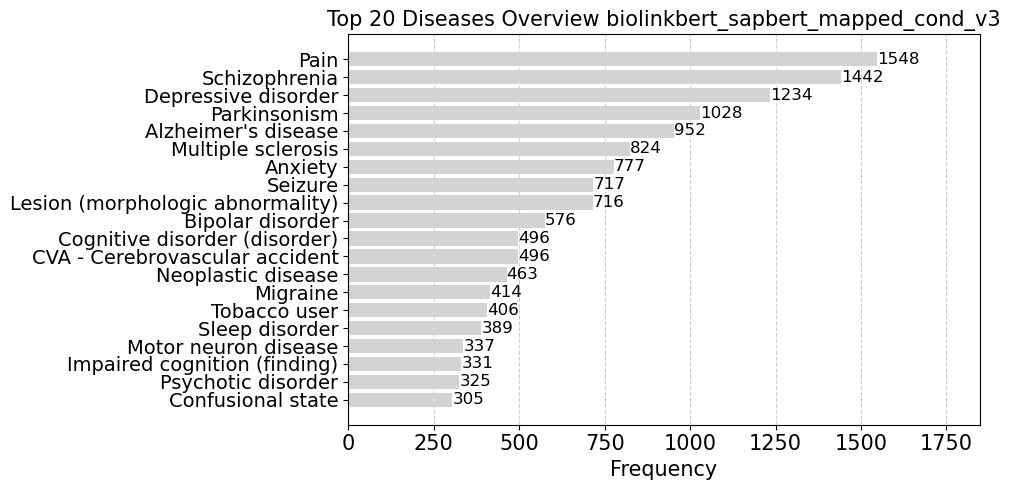

In [185]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['Neurological Disease'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(20)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title(f'Top 20 Diseases Overview {annotations_type}', fontsize=15)
plt.xlim(0, max(phase_type_counts)+300) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/disease_frequency_{annotations_type}.png')

# Display the chart
plt.show()

## Disease/ All and Completed Trials

In [72]:
# Step 1: Count total trials per disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Filter 'Completed' status and count completed trials per disease
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Calculate proportions of completed trials
completed_proportions = (completed_disease_counts / total_disease_counts).fillna(0) * 100  # Proportion in percentage

# Sorting to get top 20 diseases by total count
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(20)
sorted_completed_proportions = completed_proportions.reindex(index=sorted_diseases.index)
sorted_completed_proportions

Neurological Disease
Relapsing remitting multiple sclerosis (disorder)    60.465116
Delirium                                             42.808219
Amyotrophic lateral sclerosis                        54.607509
Psychoactive substance abuse                         73.129252
Schizoaffective disorder                             72.875817
Disorder caused by cocaine                           78.104575
Analgesia                                            47.770701
Erectile dysfunction                                 72.929936
Posttraumatic stress disorder                        50.391645
Tobacco user                                         75.409836
Psychotic disorder                                   72.098214
Epilepsy                                             73.360656
Migraine                                             67.495560
Bipolar disorder                                     71.237458
Multiple sclerosis                                   57.317073
CVA - Cerebrovascular accident    

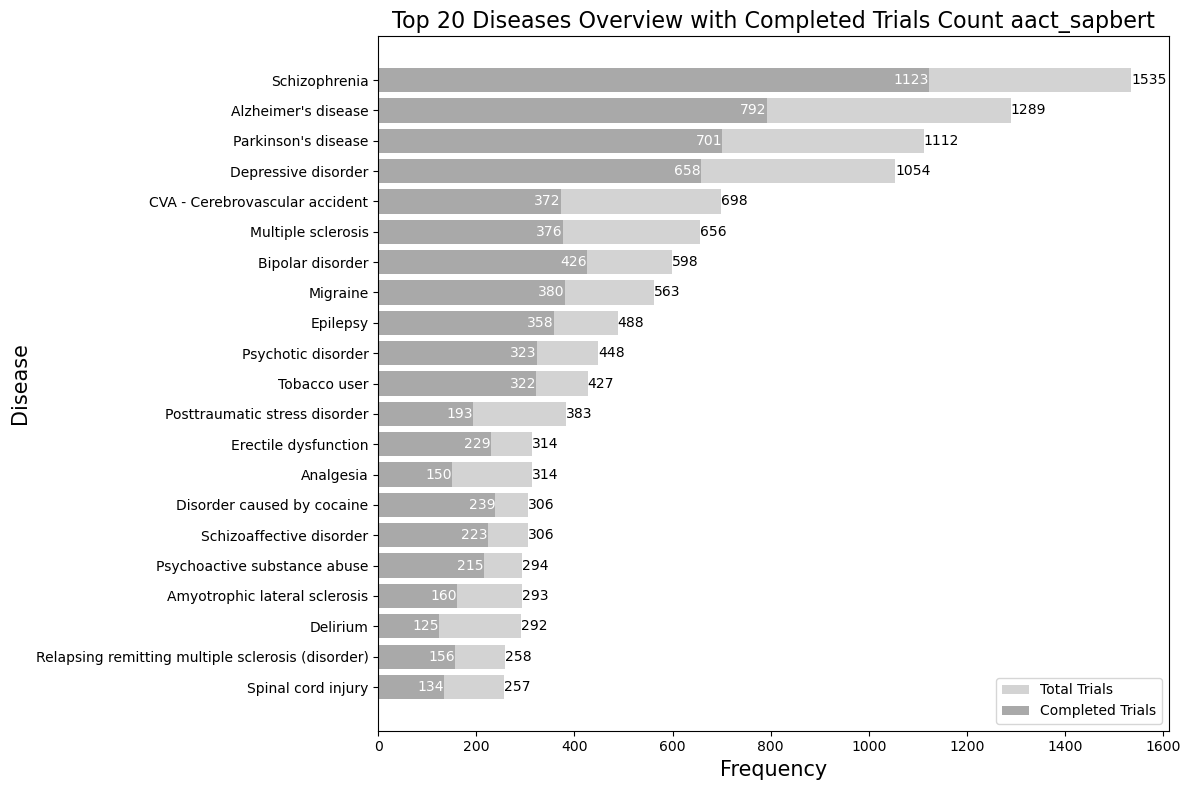

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count total trials per disease, ensuring unique nct_id within each disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per disease, ensuring unique nct_id
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Sorting total_disease_counts in descending order to determine plot order and select top diseases
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(21).index

# Reindexing completed_disease_counts according to sorted_diseases for alignment
completed_disease_counts = completed_disease_counts.reindex(index=sorted_diseases).fillna(0)

# Step 3: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_diseases, total_disease_counts[sorted_diseases], color='lightgrey', label='Total Trials')

# Plotting completed trials
bars_completed = plt.barh(sorted_diseases, completed_disease_counts[sorted_diseases], color='darkgrey', label='Completed Trials')

plt.ylabel('Disease', fontsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.title(f'Top 20 Diseases Overview with Completed Trials Count {annotations_type}', fontsize=16)
plt.yticks(ticks=range(len(sorted_diseases)), labels=sorted_diseases)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
plt.savefig(f'viz/disease_frequency_with_completed_{annotations_type}.png')

plt.show()


## Disease/ Phase

In [74]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)
top_20_diseases

phase,Early Phase 1,Not Applicable,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
Neurological Disease,,,,,,,,,
Schizophrenia,16.0,193.0,245.0,40.0,259.0,39.0,341.0,402.0,1535.0
Alzheimer's disease,38.0,109.0,338.0,62.0,394.0,36.0,208.0,104.0,1289.0
Parkinson's disease,24.0,119.0,226.0,63.0,330.0,36.0,172.0,142.0,1112.0
Depressive disorder,32.0,273.0,109.0,24.0,177.0,35.0,140.0,264.0,1054.0
CVA - Cerebrovascular accident,11.0,155.0,51.0,25.0,141.0,38.0,149.0,128.0,698.0
Multiple sclerosis,11.0,65.0,97.0,51.0,150.0,26.0,144.0,112.0,656.0
Bipolar disorder,9.0,80.0,33.0,12.0,89.0,11.0,170.0,194.0,598.0
Migraine,3.0,112.0,71.0,8.0,83.0,11.0,165.0,110.0,563.0
Epilepsy,6.0,59.0,75.0,11.0,98.0,6.0,147.0,86.0,488.0


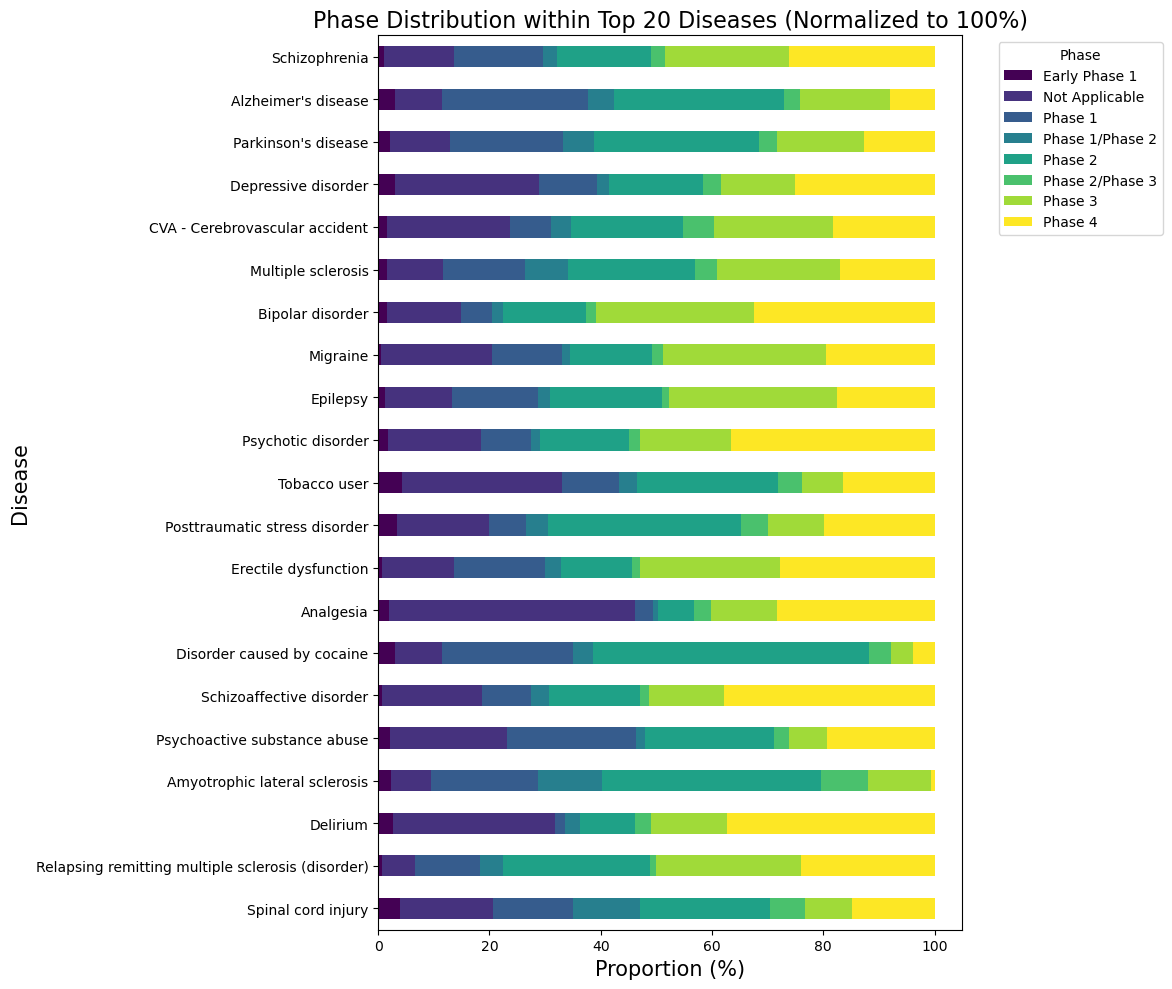

In [75]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases = top_20_diseases.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases = top_20_diseases.div(top_20_diseases.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_reversed = normalized_phases.iloc[::-1]

# Plotting with the reversed DataFrame
fig, ax = plt.subplots(figsize=(12, 10))
normalized_phases_reversed.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='none')

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title('Phase Distribution within Top 20 Diseases (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

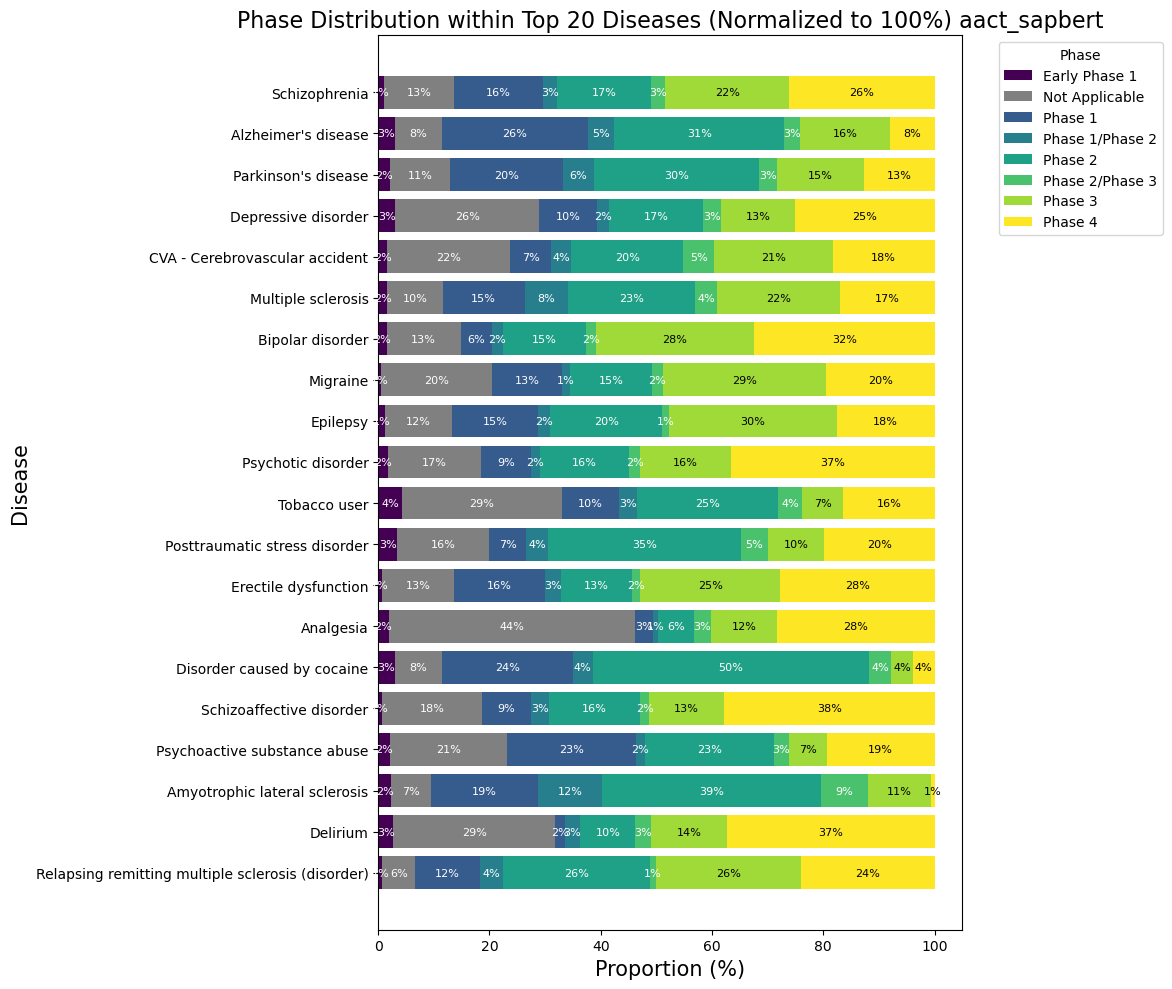

In [76]:
# Proceed with the pivoting, normalization, and plotting as before, using the filtered dataset

# Pivot the filtered data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df_filtered = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df_filtered['Total Trials'] = pivot_df_filtered.sum(axis=1)
top_20_diseases_filtered = pivot_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases_filtered = top_20_diseases_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases_filtered = top_20_diseases_filtered.div(top_20_diseases_filtered.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_filtered_reversed = normalized_phases_filtered.iloc[::-1]

# Assuming normalized_phases_filtered_reversed is prepared and contains the data to be plotted
# Convert the DataFrame to a numpy array for easier iteration in plotting
data_array = normalized_phases_filtered_reversed.to_numpy()

# The y-axis positions for each disease
y_positions = np.arange(len(normalized_phases_filtered_reversed))

# Setting up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Colors for each phase, assuming a limited number of phases
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_filtered_reversed.shape[1]))

# Cumulative array to keep track of where to start the next bar segment
cumulative = np.zeros(len(normalized_phases_filtered_reversed))

for i, (phase_name, color) in enumerate(zip(normalized_phases_filtered_reversed.columns, colors)):
    #print(phase_name)
    # The height of the bar for this phase
    phase_data = data_array[:, i]
    
    # Plotting the bar segment
    if phase_name == 'Not Applicable':
        ax.barh(y_positions, phase_data, color='grey', left=cumulative, edgecolor='none', label=phase_name)
    else:
        ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    
    # Updating the cumulative sum for the next bar segment
    cumulative += phase_data
    
    # Adding text labels within each bar segment
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        if width > 0:  # Only add labels for visible segments
            label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
            label = f'{width:.0f}%'
            ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)


# Setting the y-ticks to correspond to diseases
ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_filtered_reversed.index)

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title(f'Phase Distribution within Top 20 Diseases (Normalized to 100%) {annotations_type}', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'viz/disease_phase_proportions_{annotations_type}.png')

plt.show()


## Disease/ Time

In [77]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
disease_counts = unique_pairs['Neurological Disease'].value_counts()
disease_counts = disease_counts.sort_values(ascending=False).head(10)
disease_counts

Neurological Disease
Schizophrenia                     1535
Alzheimer's disease               1289
Parkinson's disease               1112
Depressive disorder               1054
CVA - Cerebrovascular accident     698
Multiple sclerosis                 656
Bipolar disorder                   598
Migraine                           563
Epilepsy                           488
Psychotic disorder                 448
Name: count, dtype: int64

In [78]:
aact_diseases_top_10 = aact_diseases[aact_diseases['Neurological Disease'].isin(disease_counts.index)]
aact_diseases_top_10 = aact_diseases_top_10[['nct_id', 'Neurological Disease','start_year']].drop_duplicates()
aact_diseases_top_10_year_count = aact_diseases_top_10.groupby(['start_year', 'Neurological Disease']).size().reset_index(name='count')
aact_diseases_top_10_year_count

,start_year,Neurological Disease,count
0,1982.0,CVA - Cerebrovascular accident,1
1,1985.0,CVA - Cerebrovascular accident,1
2,1987.0,Depressive disorder,4
3,1987.0,Psychotic disorder,1
4,1988.0,Depressive disorder,1
...,...,...,...
312,2024.0,Schizophrenia,10
313,2025.0,Alzheimer's disease,2
314,2025.0,CVA - Cerebrovascular accident,2
315,2025.0,Migraine,1


In [79]:
aact_diseases_top_10_year_count.columns

Index(['start_year', 'Neurological Disease', 'count'], dtype='object')

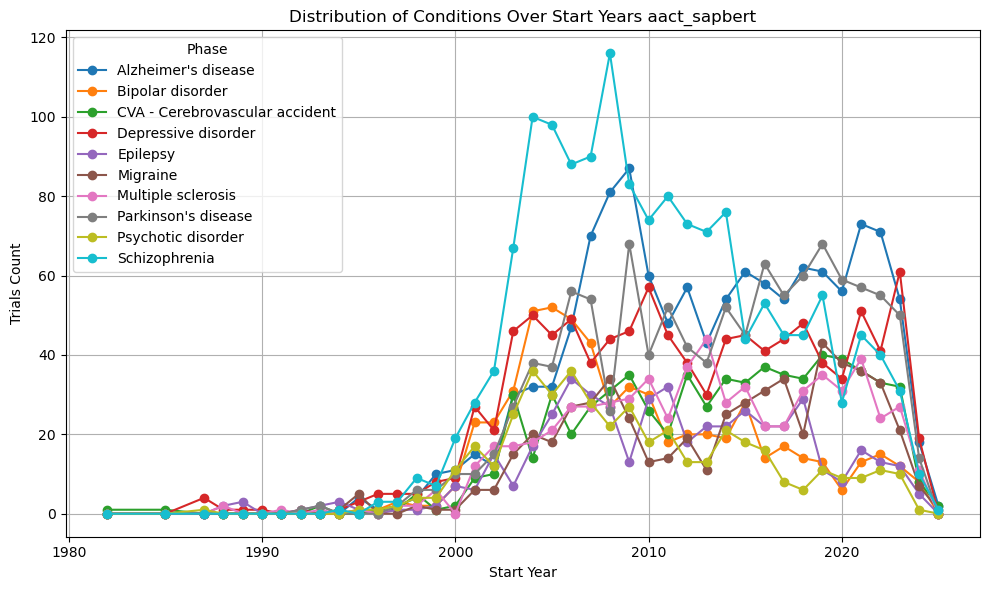

In [80]:
# Group by start_year and phase, count occurrences, and unstack to pivot phase as columns
grouped = aact_diseases_top_10.groupby(['start_year', 'Neurological Disease']).size().unstack(fill_value=0)

# Plot the line chart
grouped.plot(kind='line', marker='o', figsize=(10, 6))

# Set the title and labels
plt.title(f'Distribution of Conditions Over Start Years {annotations_type}')
plt.xlabel('Start Year')
plt.ylabel('Trials Count')

# Show the plot
plt.legend(title='Phase')
plt.grid(True)
plt.tight_layout()

plt.savefig(f"viz/disease_over_time_{annotations_type}.png")
plt.show()

# Interventions

In [81]:
aact_disease_intervention = reference_data[['nct_id', 'Neurological Disease', 'Disease Class', 'intervention_name', 'intervention_type', 'phase', 'overall_status']]

In [82]:
#filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_type'] == 'Drug') | (aact_disease_intervention['intervention_type'] == 'Biological')]
#filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_name'] != 'Saline') & (aact_disease_intervention['intervention_type'] != 'Normal saline')]
#filtered_df.head(10)

In [83]:
aact_disease_intervention['intervention_name'].isnull().sum()

12105

In [84]:
aact_disease_intervention.dropna(subset=['intervention_name'], inplace=True)
aact_disease_intervention.drop(aact_disease_intervention[aact_disease_intervention['intervention_name'] == ''].index, inplace=True)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_98514/1519962836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_disease_intervention.dropna(subset=['intervention_name'], inplace=True)
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_98514/1519962836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_disease_intervention.drop(aact_disease_intervention[aact_disease_intervention['intervention_name'] == ''].index, inplace=True)


In [85]:
aact_disease_intervention['intervention_name'].isnull().sum()

0

In [86]:
len(set(reference_data['nct_id'])), len(set(aact_disease_intervention['nct_id']))

(19607, 18720)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_98514/3461222991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_disease_intervention['intervention_name'] = aact_disease_intervention['intervention_name'].str.capitalize()


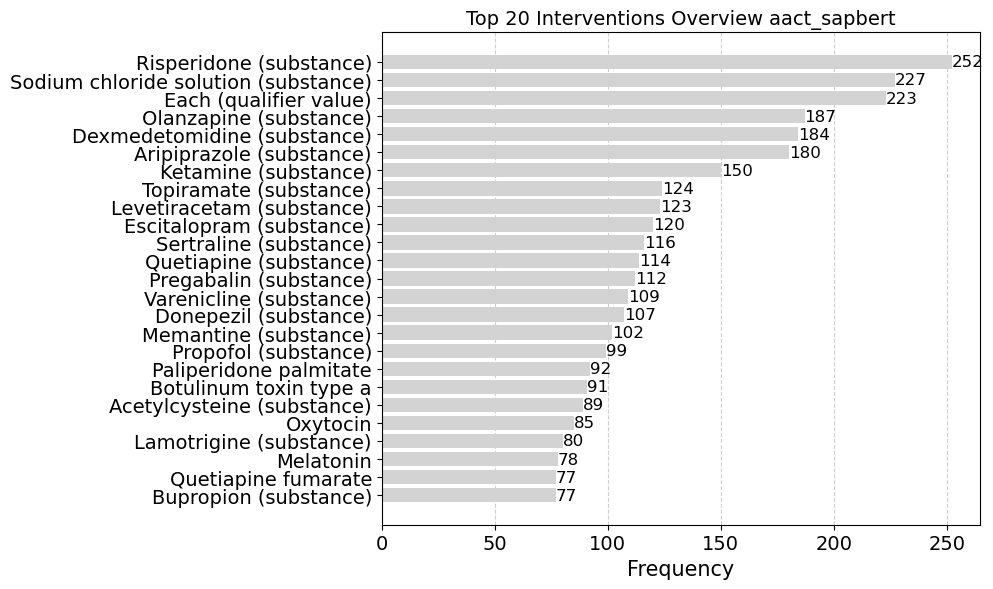

In [87]:
#filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('placebo', case=False, regex=True)]
#filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('saline', case=False, regex=True)]

aact_disease_intervention['intervention_name'] = aact_disease_intervention['intervention_name'].str.capitalize()

# Keeping only unique nct_id, phase pairs
unique_pairs = aact_disease_intervention[['nct_id', 'intervention_name']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['intervention_name'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(25)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title(f'Top 20 Interventions Overview {annotations_type}', fontsize=14)
#plt.xlim(0, 200) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/interventions_frequency_{annotations_type}.png')

# Display the chart
plt.show()

In [88]:
# Aggregate trials by disease and phase, counting unique nct_ids
intervention_phase_counts = aact_disease_intervention.groupby(['intervention_name', 'phase'])['nct_id'].nunique().reset_index()

#intervention_phase_counts_filtered = intervention_phase_counts[intervention_phase_counts['phase'] != 'Not Applicable']

# Pivot the filtered data to have interventions as rows and phases as columns
pivot_intervention_df_filtered = intervention_phase_counts.pivot(index='intervention_name', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per intervention again without 'Not Applicable' phase
pivot_intervention_df_filtered['Total Trials'] = pivot_intervention_df_filtered.sum(axis=1)
top_interventions_filtered = pivot_intervention_df_filtered.sort_values('Total Trials', ascending=False).head(20)
top_interventions_filtered

phase,Early Phase 1,Not Applicable,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
intervention_name,,,,,,,,,
Risperidone (substance),1.0,26.0,20.0,4.0,32.0,3.0,66.0,100.0,252.0
Sodium chloride solution (substance),10.0,61.0,11.0,16.0,48.0,9.0,24.0,48.0,227.0
Each (qualifier value),11.0,35.0,11.0,10.0,66.0,12.0,35.0,43.0,223.0
Olanzapine (substance),1.0,24.0,5.0,5.0,20.0,1.0,48.0,83.0,187.0
Dexmedetomidine (substance),7.0,45.0,5.0,6.0,13.0,7.0,22.0,79.0,184.0
Aripiprazole (substance),1.0,19.0,10.0,3.0,17.0,3.0,50.0,77.0,180.0
Ketamine (substance),10.0,22.0,27.0,11.0,36.0,7.0,7.0,30.0,150.0
Topiramate (substance),1.0,12.0,13.0,0.0,23.0,4.0,43.0,28.0,124.0
Levetiracetam (substance),0.0,17.0,4.0,6.0,28.0,2.0,36.0,30.0,123.0


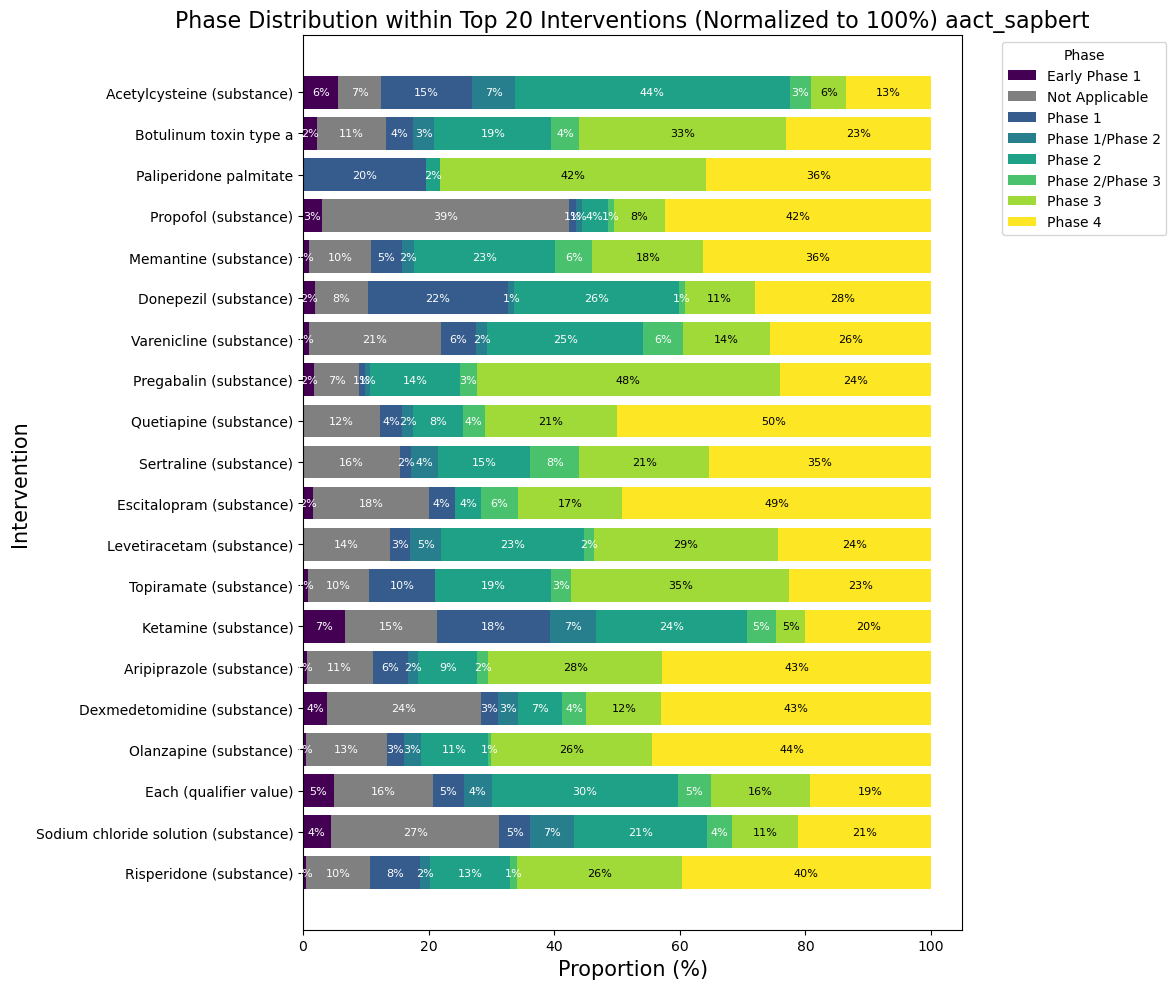

In [89]:
# Step 1: Exclude 'Not Applicable' phase from the analysis
#intervention_phase_counts_filtered = intervention_phase_counts #[intervention_phase_counts['phase'] != 'Not Applicable']

# Pivot the filtered data to have interventions as rows and phases as columns
#pivot_intervention_df_filtered = intervention_phase_counts_filtered.pivot(index='intervention_name', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per intervention again without 'Not Applicable' phase
pivot_intervention_df_filtered['Total Trials'] = pivot_intervention_df_filtered.sum(axis=1)
top_interventions_filtered = pivot_intervention_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column for plotting
top_interventions_filtered = top_interventions_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each intervention
normalized_phases_intervention_filtered = top_interventions_filtered.div(top_interventions_filtered.sum(axis=1), axis=0) * 100

# Convert the DataFrame to a numpy array for plotting
data_array = normalized_phases_intervention_filtered.to_numpy()
y_positions = np.arange(len(normalized_phases_intervention_filtered))

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_intervention_filtered.shape[1]))
cumulative = np.zeros(len(normalized_phases_intervention_filtered))

for i, (phase_name, color) in enumerate(zip(normalized_phases_intervention_filtered.columns, colors)):
    phase_data = data_array[:, i]
    # Plotting the bar segment
    if phase_name == 'Not Applicable':
        ax.barh(y_positions, phase_data, color='grey', left=cumulative, edgecolor='none', label=phase_name)
    else:
        ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    #ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    
    cumulative += phase_data
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
        label = f'{width:.0f}%' if width > 0 else ''
        ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)

ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_intervention_filtered.index)
plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Intervention', fontsize=15)
plt.title(f'Phase Distribution within Top 20 Interventions (Normalized to 100%) {annotations_type}', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'viz/intervention_phase_proportions_{annotations_type}.png')

plt.show()


## Intervention/ Disease

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_98514/4276423969.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']


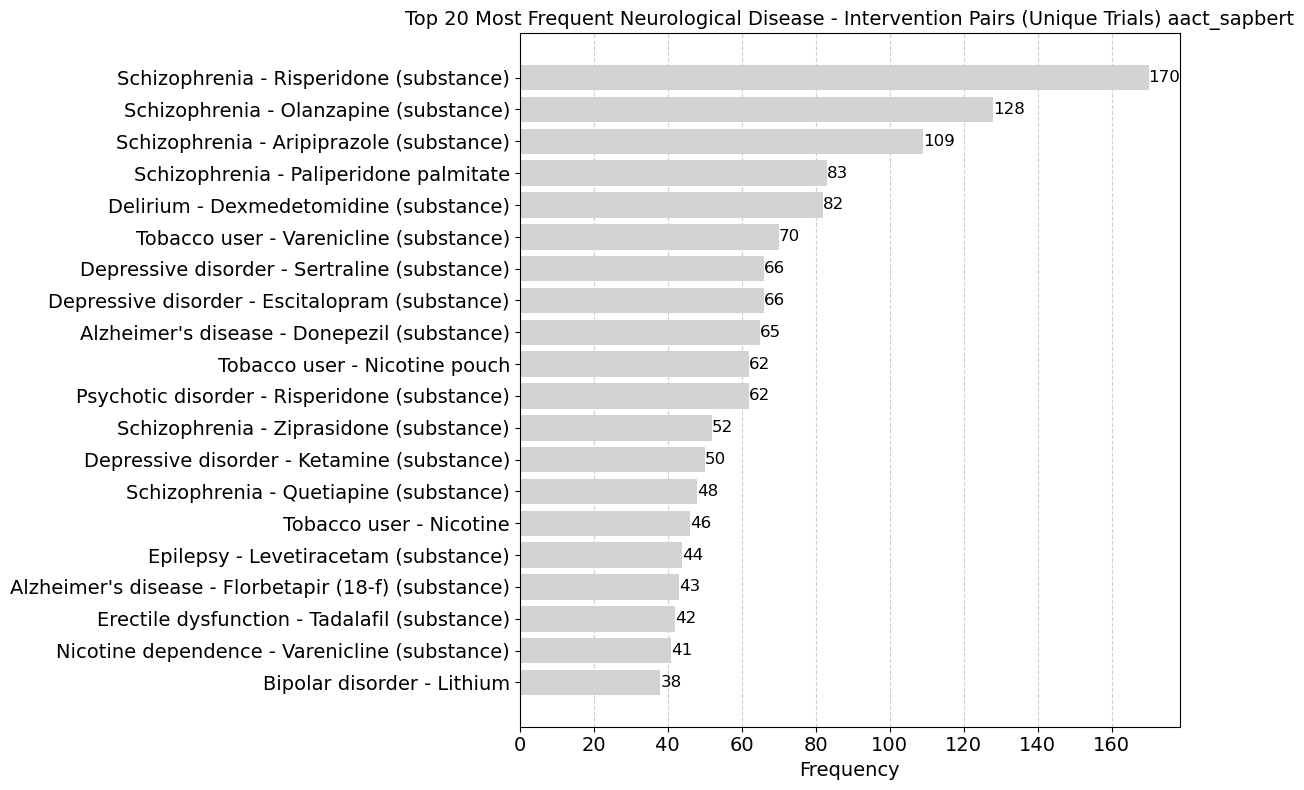

In [90]:
filtered_df = aact_disease_intervention.copy()

# Normalize 'intervention_name' to start with a capital letter
filtered_df['intervention_name'] = filtered_df['intervention_name'].str.capitalize()

# Drop duplicates based on 'nct_id' to ensure uniqueness
filtered_df_unique = filtered_df.drop_duplicates(subset=['nct_id', 'Neurological Disease', 'intervention_name'])

# Create pairs of unique 'nct_id'
filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']

# Count the frequency of each unique pair
pair_counts_unique = filtered_df_unique['disease_intervention_pair'].value_counts()

# Select the top 20 most frequent pairs
top_20_pairs_unique = pair_counts_unique.head(20).sort_values(ascending=True)  # Sort ascending for plot layout

# Plot with specified formatting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_pairs_unique.index, top_20_pairs_unique, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=14)
plt.title(f'Top 20 Most Frequent Neurological Disease - Intervention Pairs (Unique Trials) {annotations_type}', fontsize=14)
plt.tight_layout()


# Save the plot to a local folder
plt.savefig(f'viz/disease_intervention_pair_frequency_{annotations_type}.png')

plt.show()


In [91]:
disease_intervenion_pairs = filtered_df_unique[['nct_id', 'disease_intervention_pair']].drop_duplicates()

In [92]:
disease_intervenion_pairs.to_csv(f"./analysis/disease_intervenion_pairs_{annotations_type}.csv")


In [93]:
# Step 1: Drop duplicates based on 'nct_id' and 'intervention_name'
unique_interventions_df = filtered_df[['nct_id', 'intervention_name', 'Neurological Disease']].drop_duplicates()

# Step 2: Identify the top 10 interventions
top_10_interventions = unique_interventions_df['intervention_name'].value_counts().head(10).index

# Step 3: Create the dictionary for top 10 interventions with unique diseases
intervention_diseases_dict = {}
for intervention in top_10_interventions:
    # Get the unique diseases tested for each intervention
    unique_diseases = set(unique_interventions_df[unique_interventions_df['intervention_name'] == intervention]['Neurological Disease'])
    intervention_diseases_dict[intervention] = unique_diseases

intervention_diseases_dict


{'Sodium chloride solution (substance)': {'Abnormal sexual function',
  'Absent smell',
  'Acromegaly',
  'Acute infarct',
  'Acute pain',
  'Adenoiditis',
  'Adolescent idiopathic scoliosis',
  'Adverse reactions',
  'Allodynia',
  "Alzheimer's disease",
  'Amyotrophic lateral sclerosis',
  'Analgesia',
  'Anorexia nervosa',
  'Bariatric operative procedure (procedure)',
  'Bipolar affective disorder, current episode depression',
  'Bipolar disorder',
  'Blood pressure',
  'Bradbury-Eggleston syndrome',
  'Brain tissue injury',
  'Brainstem death',
  'Burn injury',
  'Bypass of stomach',
  'CIPN - Chemotherapy-induced peripheral neuropathy',
  'CVA - Cerebrovascular accident',
  'Cannabis abuse',
  'Cardiopulmonary bypass operation',
  'Carpal tunnel syndrome',
  'Central sensitization',
  'Cerebral aneurysm',
  'Cerebral hemorrhage',
  'Cerebral palsy',
  'Cerebrospinal fluid leak',
  'Cerebrovascular disease',
  'Cesarean section',
  'Chiari malformation',
  'Chronic COVID-19 syndro

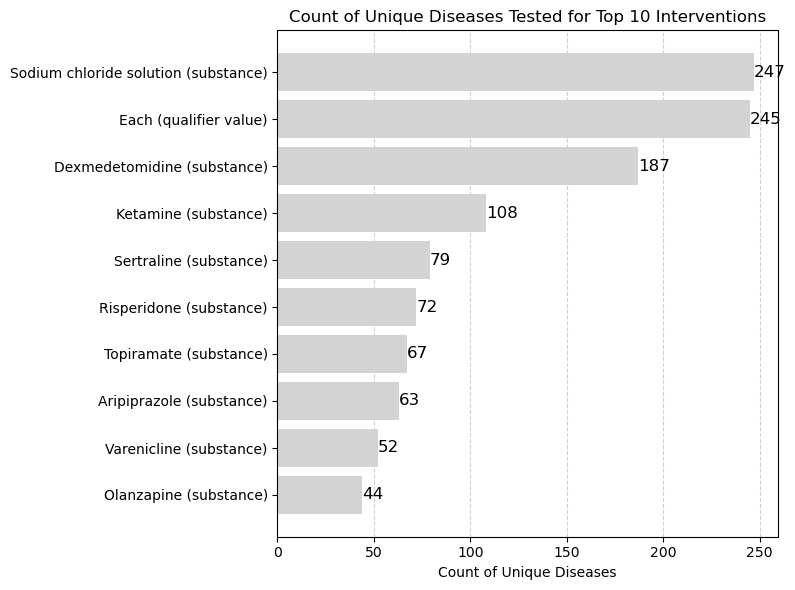

In [94]:
# Calculate unique diseases count for each intervention
unique_diseases_counts = [len(diseases) for diseases in intervention_diseases_dict.values()]
# Extract the interventions list for ordering
interventions = list(intervention_diseases_dict.keys())

# Sort interventions by the count of unique diseases in descending order
sorted_indices = sorted(range(len(unique_diseases_counts)), key=lambda i: unique_diseases_counts[i], reverse=False)
sorted_interventions = [interventions[i] for i in sorted_indices]
sorted_unique_diseases_counts = [unique_diseases_counts[i] for i in sorted_indices]

# Plotting with sorted data
plt.figure(figsize=(8, 6))
bars = plt.barh(sorted_interventions, sorted_unique_diseases_counts, color='lightgrey', zorder=2)

# Add labels to each bar
for bar, count in zip(bars, sorted_unique_diseases_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}', va='center', fontsize=12)

plt.xlabel('Count of Unique Diseases')
#plt.ylabel('Intervention')
plt.title('Count of Unique Diseases Tested for Top 10 Interventions')
plt.tight_layout()

# Include grid lines on the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.show()


# Comparison aact vs bert

In [93]:
df = pd.read_excel("data/quality_checks/biolinkbert_annotations_sample2_50_reviewed.xlsx")

In [94]:
df.head()

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions,"bert_performance (0: equal, 1: better, 2: worse)",tricky,comment
0,NCT01942161,aripiprazole high (24 - 30 mg/day)|aripiprazol...,aripiprazole,schizophrenia,schizophrenia,1,NaN,NaN
1,NCT02363517,sofosbuvir/ledispasvir fixed dose combination ...,ledipasvir|sofosbuvir,"substance abuse, intravenous|hepatitis c",hepatitis c virus,2,1.0,substance abuse indirectly implied
2,NCT03945279,biib100,biib100,amyotrophic lateral sclerosis,amyotrophic lateral sclerosis,0,NaN,NaN
3,NCT01137110,NaN,levetiracetam,subarachnoid hemorrhage,seizures|subarachnoid hemorrhage,1,NaN,NaN
4,NCT00004418,glyceryl trierucate/glyceryl trioleate,glyceryl trierucate|glyceryl trioleate|lorenzo...,adrenoleukodystrophy,adrenoleukodystrophy,1,NaN,NaN


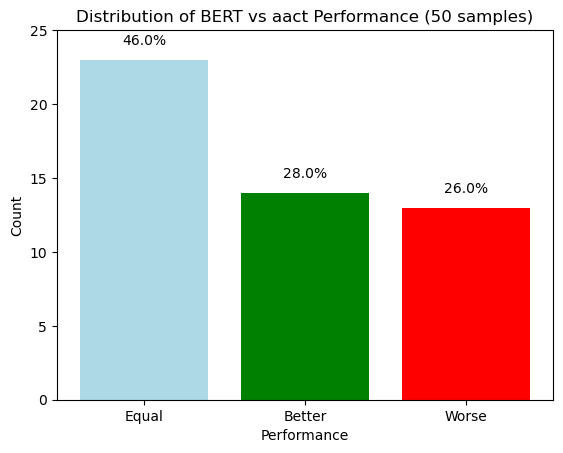

In [98]:
# Group by 'bert_performance' and count occurrences
performance_distribution = df['bert_performance (0: equal, 1: better, 2: worse)'].value_counts()

# Define labels for each category
labels = ['Equal', 'Better', 'Worse']

# Plot the bar chart
plt.bar(labels, performance_distribution, color=['lightblue', 'green', 'red'])

# Calculate the percentage of each category
total_count = performance_distribution.sum()
percentages = [count / total_count * 100 for count in performance_distribution]

# Annotate bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(i, performance_distribution[i] + 1, f"{percentage:.1f}%", ha='center')
    
# Set the y-axis limit to reach 30
plt.ylim(0, 25)
# Set the title and labels
plt.title('Distribution of BERT vs aact Performance (50 samples)')
plt.xlabel('Performance')
plt.ylabel('Count')

plt.savefig("viz/bert_vs_aact_manual.png")
# Show the plot
plt.show()

### BERT advantages
- more details
- more specific
- easier to aggregate

In [96]:
df[df['bert_performance (0: equal, 1: better, 2: worse)'] == 1]

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions,"bert_performance (0: equal, 1: better, 2: worse)",tricky,comment
0,NCT01942161,aripiprazole high (24 - 30 mg/day)|aripiprazol...,aripiprazole,schizophrenia,schizophrenia,1,NaN,NaN
3,NCT01137110,NaN,levetiracetam,subarachnoid hemorrhage,seizures|subarachnoid hemorrhage,1,NaN,NaN
4,NCT00004418,glyceryl trierucate/glyceryl trioleate,glyceryl trierucate|glyceryl trioleate|lorenzo...,adrenoleukodystrophy,adrenoleukodystrophy,1,NaN,NaN
5,NCT00829218,type: other,glutamate|msg,fibromyalgia|irritable bowel syndrome,fibromyalgia|ibs|irritable bowel syndrome,1,NaN,NaN
7,NCT00331825,risperidone and olanzapine,olanzapine|risperidone,extrapyramidal syndrome|schizophrenia,eps|neuroleptic-induced acute dystonia|parkins...,1,1.0,extrapyramidal syndrome not in the text
8,NCT03406702,cx-8998,cx-8998,epilepsy,absence seizures|idiopathic generalized epilepsy,1,1.0,only epilepsy missing in bert
10,NCT06100276,amt-162,amt-162|therapy,amyotrophic lateral sclerosis,rapidly progressive als|sod1 amyotrophic later...,1,1.0,abbreviations not well disambiguated
11,NCT00095524,aripiprazole,aripiprazole|olanzapine,schizoaffective disorder|psychotic disorders|b...,overweight|psychotic disorders|schizoaffective...,1,NaN,NaN
16,NCT01957774,thr-18,alteplase|thr-18|tissue plasminogen activator,stroke,acute ischemic stroke|ischemic strokes|stroke,1,NaN,NaN
27,NCT01883505,levodopa and carbidopa,carbidopa|ld|levodopa|nd0612,parkinson disease,- treated|motor fluctuations|parkinson disease,1,NaN,NaN


### Issues
- main issue: mentions available in other parts of the data, e.g. brief title, detailed trial description
- extractions noise

In [97]:
df[df['bert_performance (0: equal, 1: better, 2: worse)'] == 2]

,nct_id,canonical_aact_interventions,canonical_BioLinkBERT-base_interventions,canonical_aact_conditions,canonical_BioLinkBERT-base_conditions,"bert_performance (0: equal, 1: better, 2: worse)",tricky,comment
1,NCT02363517,sofosbuvir/ledispasvir fixed dose combination ...,ledipasvir|sofosbuvir,"substance abuse, intravenous|hepatitis c",hepatitis c virus,2,1.0,substance abuse indirectly implied
9,NCT00538642,ziprasidone,antipsychotics|ziprasidone,schizoaffective disorder|psychotic disorders|b...,bipolar disorder|diabetes|diabetic|pre-diabeti...,2,1.0,NaN
14,NCT03432871,type: dietary supplement,nicotinamide riboside,progressive external ophthalmoplegia|ophthalmo...,mitochondrial disease|mitochondrial disorders,2,1.0,ophthalmoplegia mentioned only in the detailed...
19,NCT00986115,memantine,memantine,epilepsy,alzheimer disease|epilepsy|seizures,2,1.0,alzheimer disease is a false positive
22,NCT01280006,celecoxib|indomethacin,NaN,stroke|hypertension|cardiovascular diseases|sl...,intermittent hypoxia,2,1.0,Arms and Interventions field of AACT? Missing ...
23,NCT02034474,tocilizumab,il-6 receptor antibody|tocilizumab,schizoaffective disorder|psychotic disorders|s...,"residual positive, negative, and cognitive sym...",2,NaN,NaN
25,NCT01069159,propranolol hydrochloride,propranolol,"stress disorders, post-traumatic|traumatic memory",propranolol treatment of traumatic memories|tr...,2,NaN,NaN
28,NCT00320723,"bupropion, transdermal nicotine patch",bupropion,schizoaffective disorder|psychotic disorders|s...,major mental illness|smoking,2,1.0,schizophrenia mentioned in brief title and det...
34,NCT00242177,actos (pioglitazone),NaN,"multiple sclerosis, relapsing-remitting","multiple sclerosis|multiple sclerosis, relapsi...",2,1.0,drug was mentioned in the detailed description
35,NCT01453127,i-123 ioflupane solution injection prior to sp...,NaN,rem sleep behavior disorder|dementia|parkinson...,alzheimer disease|dementia with lewy bodies|mi...,2,1.0,drug was mentioned in the detailed description


## disease-intervention pairs

In [99]:
if evaluate_snomed_link:
    suffix = "_sapbert"
else:
    suffix = ""

In [101]:
pairs_aact = pd.read_csv(f"./analysis/disease_intervenion_pairs_aact{suffix}.csv", index_col=0)
pairs_aact['disease_intervention_pair'] = pairs_aact['disease_intervention_pair'].str.lower()

pairs_bert = pd.read_csv(f"./analysis/disease_intervenion_pairs_biolinkbert{suffix}.csv", index_col=0)
pairs_bert['disease_intervention_pair'] = pairs_bert['disease_intervention_pair'].str.lower()


In [102]:
grouped_df_aact = pairs_aact.groupby('disease_intervention_pair').agg(
    nct_ids_aact=('nct_id', list),              # Create a list of nct_ids
    count_nct_ids_aact=('nct_id', 'nunique')    # Count unique nct_ids
).reset_index()
grouped_df_aact = grouped_df_aact.sort_values(by='count_nct_ids_aact', ascending=False)
grouped_df_aact

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact
29111,schizophrenia - risperidone (substance),"[NCT00000374, NCT00006195, NCT00014001, NCT000...",170
28919,schizophrenia - olanzapine (substance),"[NCT00000374, NCT00001656, NCT00006195, NCT000...",128
28545,schizophrenia - aripiprazole (substance),"[NCT00036127, NCT00036361, NCT00044655, NCT000...",109
28943,schizophrenia - paliperidone palmitate,"[NCT00073320, NCT00077714, NCT00078039, NCT000...",83
7995,delirium - dexmedetomidine (substance),"[NCT00095251, NCT00351299, NCT00455143, NCT004...",82
...,...,...,...
12327,facioscapulohumeral muscular dystrophy (disord...,[NCT03123913],1
12326,facioscapulohumeral muscular dystrophy (disord...,[NCT00104078],1
12325,facioscapulohumeral muscular dystrophy (disord...,[NCT02948244],1
12324,facioscapulohumeral muscular dystrophy (disord...,[NCT01970735],1


In [103]:
grouped_df_bert = pairs_bert.groupby('disease_intervention_pair').agg(
    nct_ids_bert=('nct_id', list),              # Create a list of nct_ids
    count_nct_ids_bert=('nct_id', 'nunique')    # Count unique nct_ids
).reset_index()
grouped_df_bert = grouped_df_bert.sort_values(by='count_nct_ids_bert', ascending=False)


In [104]:
grouped_df_bert

,disease_intervention_pair,nct_ids_bert,count_nct_ids_bert
39041,schizophrenia - anti-psychotic agent (substance),"[NCT00000371, NCT00001656, NCT00005658, NCT000...",261
32716,parkinson's disease - levodopa (substance),"[NCT00004576, NCT00004733, NCT00006077, NCT000...",205
39435,schizophrenia - risperidone (substance),"[NCT00000267, NCT00006195, NCT00014001, NCT000...",176
39343,schizophrenia - olanzapine (substance),"[NCT00001656, NCT00006195, NCT00007774, NCT000...",134
41268,smoker - nicotine,"[NCT00108537, NCT00115687, NCT00135746, NCT001...",108
...,...,...,...
17360,frame-shift mutation - multiple of the median ...,[NCT00844597],1
17361,frame-shift mutation - naftifine hydrochloride,[NCT02500381],1
17362,frame-shift mutation - trvl 61866,[NCT00844597],1
17363,fraxinus americana specific diagnostic allerge...,[NCT00224640],1


In [105]:
# Merge the DataFrames on 'disease_intervention_pair'
merged_df = pd.merge(grouped_df_aact, grouped_df_bert, on='disease_intervention_pair', how='outer')

# Function to calculate intersections and differences
def calculate_overlaps(row):
    ids_a = set(row['nct_ids_aact']) if isinstance(row['nct_ids_aact'], list) else set()
    ids_b = set(row['nct_ids_bert']) if isinstance(row['nct_ids_bert'], list) else set()
    overlap = ids_a & ids_b
    unique_aact = ids_a - ids_b
    unique_bert = ids_b - ids_a
    return pd.Series({
        'overlap_count': len(overlap),
        'unique_aact_count': len(unique_aact),
        'unique_bert_count': len(unique_bert),
        'overlap_values': list(overlap),
        'unique_aact_values': list(unique_aact),
        'unique_bert_values': list(unique_bert)
    })

# Apply the function to each row
merged_df[['overlap_count', 'unique_aact_count', 'unique_bert_count', 
           'overlap_values', 'unique_aact_values', 'unique_bert_values']] = merged_df.apply(calculate_overlaps, axis=1)



In [106]:
merged_df.head(2)

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact,nct_ids_bert,count_nct_ids_bert,overlap_count,unique_aact_count,unique_bert_count,overlap_values,unique_aact_values,unique_bert_values
0,1011 - 1011,[NCT03829878],1.0,NaN,NaN,0,1,0,[],[NCT03829878],[]
1,115 - adult vaccine product containing only ac...,NaN,NaN,[NCT01642589],1.0,0,0,1,[],[],[NCT01642589]


In [107]:
merged_df['combined_frq'] = merged_df['overlap_count'] + merged_df['unique_aact_count'] + merged_df['unique_bert_count']
merged_df = merged_df.sort_values(by='combined_frq', ascending=False)


In [109]:
merged_df.head()

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact,nct_ids_bert,count_nct_ids_bert,overlap_count,unique_aact_count,unique_bert_count,overlap_values,unique_aact_values,unique_bert_values,combined_frq
60470,schizophrenia - anti-psychotic agent (substance),"[NCT00931996, NCT01050582, NCT01192880, NCT013...",10.0,"[NCT00000371, NCT00001656, NCT00005658, NCT000...",261.0,5,5,256,"[NCT03548155, NCT02983188, NCT02360319, NCT020...","[NCT05039489, NCT00931996, NCT01050582, NCT011...","[NCT00538642, NCT00169026, NCT00757705, NCT021...",266
61230,schizophrenia - risperidone (substance),"[NCT00000374, NCT00006195, NCT00014001, NCT000...",170.0,"[NCT00000267, NCT00006195, NCT00014001, NCT000...",176.0,95,75,81,"[NCT00526877, NCT00761670, NCT02019329, NCT001...","[NCT02051387, NCT00418873, NCT02650102, NCT021...","[NCT03237052, NCT00539071, NCT02765555, NCT008...",251
50703,parkinson's disease - levodopa (substance),"[NCT00004733, NCT00096720, NCT00153972, NCT004...",26.0,"[NCT00004576, NCT00004733, NCT00006077, NCT000...",205.0,18,8,187,"[NCT01351168, NCT00153972, NCT00004733, NCT015...","[NCT03119636, NCT01770145, NCT01283594, NCT062...","[NCT03582371, NCT00462007, NCT02225548, NCT005...",213
60989,schizophrenia - olanzapine (substance),"[NCT00000374, NCT00001656, NCT00006195, NCT000...",128.0,"[NCT00001656, NCT00006195, NCT00007774, NCT000...",134.0,77,51,57,"[NCT00485823, NCT00827918, NCT00169065, NCT002...","[NCT02051387, NCT02650102, NCT01129674, NCT001...","[NCT01420575, NCT02804568, NCT00078039, NCT000...",185
60483,schizophrenia - aripiprazole (substance),"[NCT00036127, NCT00036361, NCT00044655, NCT000...",109.0,"[NCT00036361, NCT00088049, NCT00095524, NCT001...",99.0,61,48,38,"[NCT00737256, NCT00352339, NCT00392197, NCT013...","[NCT02650102, NCT01104766, NCT02054702, NCT011...","[NCT00325689, NCT03237052, NCT01742390, NCT038...",147


In [110]:
# Sorting the DataFrame by 'combined_frq' and selecting the top 20
top_df = merged_df.sort_values(by='combined_frq', ascending=False).head(20)

# Calculate proportions scaled to 100
top_df['total'] = top_df['overlap_count'] + top_df['unique_aact_count'] + top_df['unique_bert_count']
top_df['overlap_pct'] = (top_df['overlap_count'] / top_df['total']) * 100
top_df['unique_aact_pct'] = (top_df['unique_aact_count'] / top_df['total']) * 100
top_df['unique_bert_pct'] = (top_df['unique_bert_count'] / top_df['total']) * 100
top_df.head()

,disease_intervention_pair,nct_ids_aact,count_nct_ids_aact,nct_ids_bert,count_nct_ids_bert,overlap_count,unique_aact_count,unique_bert_count,overlap_values,unique_aact_values,unique_bert_values,combined_frq,total,overlap_pct,unique_aact_pct,unique_bert_pct
60470,schizophrenia - anti-psychotic agent (substance),"[NCT00931996, NCT01050582, NCT01192880, NCT013...",10.0,"[NCT00000371, NCT00001656, NCT00005658, NCT000...",261.0,5,5,256,"[NCT03548155, NCT02983188, NCT02360319, NCT020...","[NCT05039489, NCT00931996, NCT01050582, NCT011...","[NCT00538642, NCT00169026, NCT00757705, NCT021...",266,266,1.879699,1.879699,96.240602
61230,schizophrenia - risperidone (substance),"[NCT00000374, NCT00006195, NCT00014001, NCT000...",170.0,"[NCT00000267, NCT00006195, NCT00014001, NCT000...",176.0,95,75,81,"[NCT00526877, NCT00761670, NCT02019329, NCT001...","[NCT02051387, NCT00418873, NCT02650102, NCT021...","[NCT03237052, NCT00539071, NCT02765555, NCT008...",251,251,37.848606,29.880478,32.270916
50703,parkinson's disease - levodopa (substance),"[NCT00004733, NCT00096720, NCT00153972, NCT004...",26.0,"[NCT00004576, NCT00004733, NCT00006077, NCT000...",205.0,18,8,187,"[NCT01351168, NCT00153972, NCT00004733, NCT015...","[NCT03119636, NCT01770145, NCT01283594, NCT062...","[NCT03582371, NCT00462007, NCT02225548, NCT005...",213,213,8.450704,3.755869,87.793427
60989,schizophrenia - olanzapine (substance),"[NCT00000374, NCT00001656, NCT00006195, NCT000...",128.0,"[NCT00001656, NCT00006195, NCT00007774, NCT000...",134.0,77,51,57,"[NCT00485823, NCT00827918, NCT00169065, NCT002...","[NCT02051387, NCT02650102, NCT01129674, NCT001...","[NCT01420575, NCT02804568, NCT00078039, NCT000...",185,185,41.621622,27.567568,30.810811
60483,schizophrenia - aripiprazole (substance),"[NCT00036127, NCT00036361, NCT00044655, NCT000...",109.0,"[NCT00036361, NCT00088049, NCT00095524, NCT001...",99.0,61,48,38,"[NCT00737256, NCT00352339, NCT00392197, NCT013...","[NCT02650102, NCT01104766, NCT02054702, NCT011...","[NCT00325689, NCT03237052, NCT01742390, NCT038...",147,147,41.496599,32.653061,25.850340


In [111]:
top_df.to_csv(f"analysis/overlapping_unique_nct_ids{suffix}.csv")

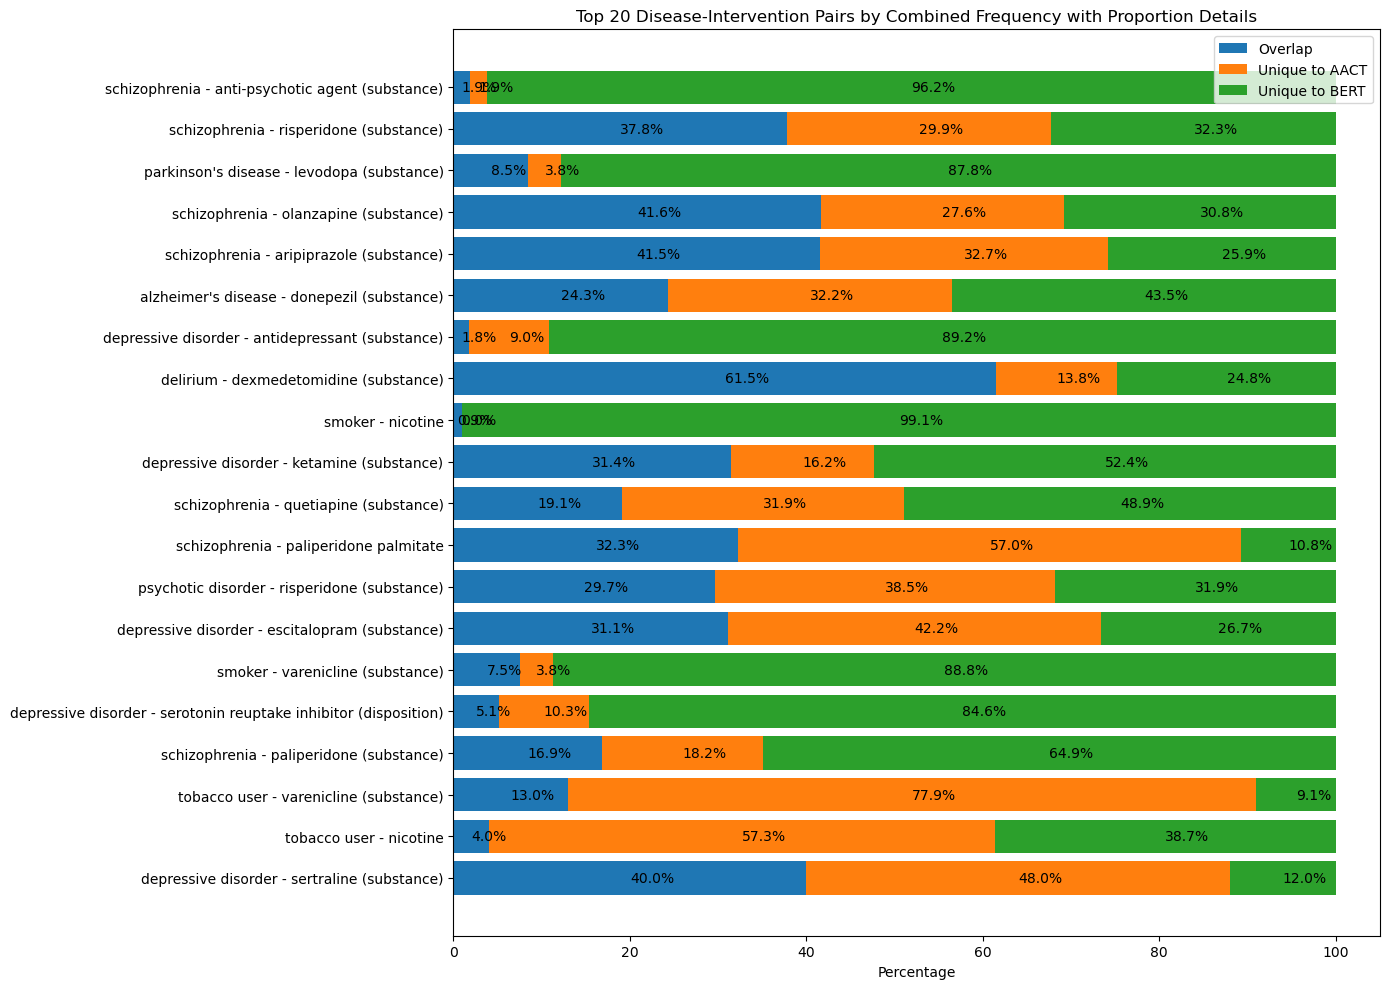

In [112]:
# Plotting
fig, ax = plt.subplots(figsize=(14, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Define color scheme
bars_overlap = ax.barh(top_df['disease_intervention_pair'], top_df['overlap_pct'], color=colors[0], label='Overlap')
bars_unique_aact = ax.barh(top_df['disease_intervention_pair'], top_df['unique_aact_pct'], left=top_df['overlap_pct'], color=colors[1], label='Unique to AACT')
bars_unique_bert = ax.barh(top_df['disease_intervention_pair'], top_df['unique_bert_pct'], left=top_df['overlap_pct'] + top_df['unique_aact_pct'], color=colors[2], label='Unique to BERT')

# Add labels to the bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width / 2
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

add_labels(bars_overlap)
add_labels(bars_unique_aact)
add_labels(bars_unique_bert)

# Invert y-axis to have the first item at the top
ax.invert_yaxis()

ax.set_xlabel('Percentage')
ax.set_title('Top 20 Disease-Intervention Pairs by Combined Frequency with Proportion Details')
ax.set_yticks(range(len(top_df)))
ax.set_yticklabels(top_df['disease_intervention_pair'])
ax.legend()
plt.tight_layout()
plt.savefig(f'viz/bert_vs_aacts_drug_disease_pairs_nctids{suffix}.png')

plt.show()